In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LassoCV
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

path_name = 'your_path_name_here/mental_health.csv'
df=pd.read_csv(path_name)
print(df)

df = df.drop_duplicates()

#REDUCED SAMPLING
import random
random.seed(1)
size = list(df.index)
sample = random.sample(size,1000)
df = df.loc[sample]

#Split the matrix into predictors and response 
msg=df["text"]
msg=msg.str.replace('[^a-zA-Z0-9]+'," h", regex = True) 
y=df['label'].values
y 


#Stemming and Tokenising
stemmer=PorterStemmer()
msg=msg.apply(lambda line:[stemmer.stem(token.lower()) for token in word_tokenize(line)]).apply(lambda token:" ".join(token))
msg=msg.apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))

#Vectorising
tf=TfidfVectorizer() 
data_vec=tf.fit_transform(msg)
np.shape(data_vec)

#Train, Validation, and Test Split ###RANDOMSTATE=1###
from sklearn.model_selection import train_test_split
#test_size=0.3 implies 70% will be used to training and 30% for testing. 
#random_state sets seed for random number generator, ensuring reducibility
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.3,random_state=1)

                                                    text  label
0      dear american teens question dutch person hear...      0
1      nothing look forward lifei dont many reasons k...      1
2      music recommendations im looking expand playli...      0
3      im done trying feel betterthe reason im still ...      1
4      worried  year old girl subject domestic physic...      1
...                                                  ...    ...
27972  posting everyday people stop caring  religion ...      0
27973  okay definetly need hear guys opinion ive pret...      0
27974  cant get dog think ill kill myselfthe last thi...      1
27975  whats point princess bridei really think like ...      1
27976  got nudes person might might know snapchat do ...      0

[27977 rows x 2 columns]


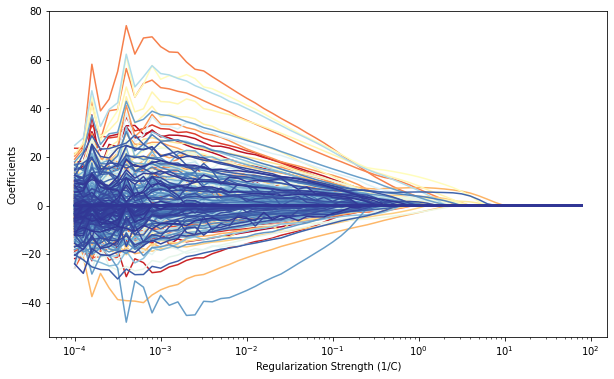

In [75]:
from sklearn.linear_model import LogisticRegression

# Vary the regularization strength (C) on a logarithmic scale
alphas = 10.0 ** np.arange(-4, 2, 0.1)
coefs = []

# Fit a logistic regression model for each value of C and store the coefficients
for alpha in alphas:
    modelLR_lasso = LogisticRegression(penalty='l1', C=1/alpha, solver='liblinear', random_state=1)
    modelLR_lasso.fit(x_train, y_train)
    coefs.append(modelLR_lasso.coef_[0])

# Plot the Lasso regularization path with varying colors
plt.figure(figsize=(10, 6))
colors = plt.cm.RdYlBu(np.linspace(0, 1, len(coefs[0])))
for coef, color in zip(np.array(coefs).T, colors):
    plt.plot(alphas, coef, color=color)

plt.xscale('log')
plt.xlabel('Regularization Strength (1/C)')
plt.ylabel('Coefficients')
#plt.title('Lasso Regularization Path')
plt.savefig("L1-Reg-Path.pdf", bbox_inches="tight")
plt.show()



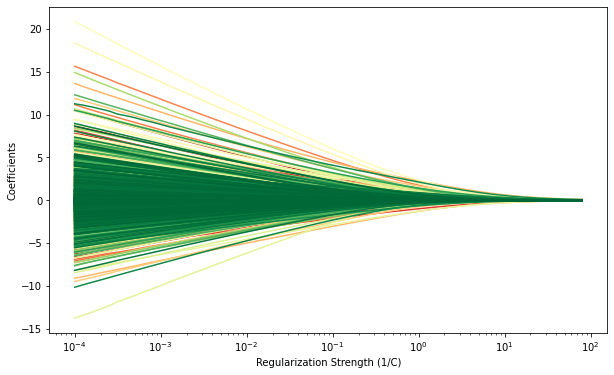

In [76]:
from sklearn.linear_model import LogisticRegression
# Vary the regularization strength (C) on a logarithmic scale
alphas = 10.0 ** np.arange(-4, 2,0.1)
coefs = []


# Fit a logistic regression model for each value of C and store the coefficients
for alpha in alphas:
    modelLR_lasso = LogisticRegression(penalty='l2', C=1/alpha, solver='liblinear')
    modelLR_lasso.fit(x_train, y_train)
    coefs.append(modelLR_lasso.coef_[0])

# Plot the Lasso regularization path
plt.figure(figsize=(10, 6))
colors = plt.cm.RdYlGn(np.linspace(0, 1, len(coefs[0])))
for coef, color in zip(np.array(coefs).T, colors):
    plt.plot(alphas, coef, color=color)
plt.xscale('log')
plt.xlabel('Regularization Strength (1/C)')
plt.ylabel('Coefficients')
#plt.title('Ridge Regularization Path')
plt.savefig("L2-Reg-Path.pdf", bbox_inches="tight")
plt.show()